In [1]:
import cv2
from os import listdir
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy import eye, newaxis, concatenate, ndarray, array, where, column_stack
from typing import List, Tuple

In [2]:
def convert2onehot(label: str) -> ndarray:
    """:param label是由4個字元組成的字串."""
    d_ = {'2': 0, '3': 1, '4': 2, '5': 3, '7': 4, '9': 5, 'A': 6, 'C': 7, 'F': 8, 'H': 9, 'K': 10, 'M': 11, 'N': 12,
         'P': 13, 'Q': 14, 'R': 15, 'T': 16, 'Y': 17, 'Z': 18}
    l = [d_[i] for i in label]
    result = eye(max(d_.values()) + 1)[l]
    return result[newaxis, :]


v1 = convert2onehot('F3YA')
v2 = convert2onehot('25MN')
print(v1)
print(v2)
print(v1.shape)
print(v2.shape)

vvv = concatenate([v1, v2], axis=0)
print(vvv)
print(vvv.shape)
print(vvv[0])
print(vvv[0].shape)

[[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
[[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]]
(1, 4, 19)
(1, 4, 19)
[[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 

# 非局部平均去噪：[link1](https://blog.csdn.net/qq_38410428/article/details/93046099)、[link2](https://zh.wikipedia.org/wiki/%E9%9D%9E%E5%B1%80%E9%83%A8%E5%B9%B3%E5%9D%87)

[[[210 210 210]
  [238 238 238]
  [208 208 208]
  ...
  [214 214 214]
  [204 204 204]
  [178 178 178]]

 [[245 245 245]
  [182 182 182]
  [217 217 217]
  ...
  [214 214 214]
  [177 177 177]
  [191 191 191]]

 [[ 84  84  84]
  [208 208 208]
  [169 169 169]
  ...
  [197 197 197]
  [179 179 179]
  [236 236 236]]

 ...

 [[216 216 216]
  [188 188 188]
  [209 209 209]
  ...
  [191 191 191]
  [175 175 175]
  [225 225 225]]

 [[216 216 216]
  [250 250 250]
  [205 205 205]
  ...
  [220 220 220]
  [188 188 188]
  [226 226 226]]

 [[236 236 236]
  [221 221 221]
  [244 244 244]
  ...
  [192 192 192]
  [249 249 249]
  [192 192 192]]]
(52, 120, 3)
18720


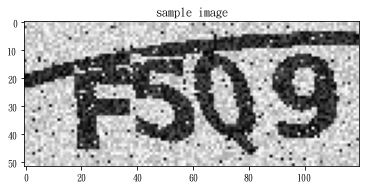

In [3]:
# load original image
img = cv2.imread('D:/Python_Project/dataset/THSR_captcha/F5Q9.jpg')  # 讀取 RGB 三個 channels 的彩色圖片，而忽略透明度的 channel
print(img)
print(img.shape)
print(img.size)
plt.imshow(img)
plt.axis('on')
plt.title('sample image')
plt.show()

(52, 120, 3)
18720


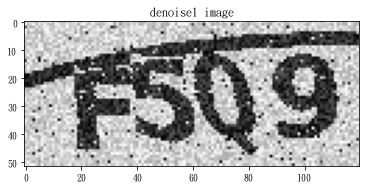

In [4]:
# denoise1
img1 = cv2.fastNlMeansDenoisingColored(img, None, 3, 3, 7, 21)  # default setting
print(img1.shape)
print(img1.size)
plt.imshow(img1)
plt.axis('on')
plt.title('denoise1 image')
plt.show()

(52, 120, 3)
18720


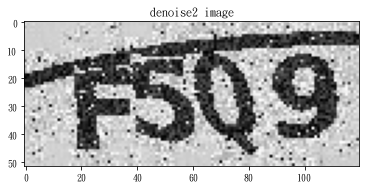

In [5]:
# denoise2
img2 = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)  # 參數數值再自己挑看看
print(img2.shape)
print(img2.size)
plt.imshow(img2)
plt.axis('on')
plt.title('denoise2 image')
plt.show()

(52, 120, 3)
18720


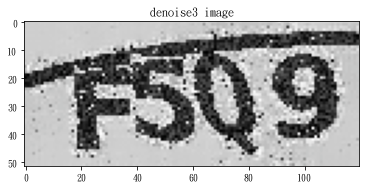

In [6]:
# denoise3
img3 = cv2.fastNlMeansDenoisingColored(img, None, 20, 20, 7, 21)  # 參數數值再自己挑看看
print(img3.shape)
print(img3.size)
plt.imshow(img3)
plt.axis('on')
plt.title('denoise3 image')
plt.show()

(52, 120, 3)
18720


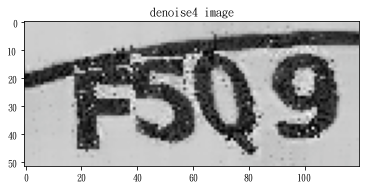

In [7]:
# denoise4
img4 = cv2.fastNlMeansDenoisingColored(img, None, 30, 30, 7, 21)  # 參數數值再自己挑看看
print(img4.shape)
print(img4.size)
plt.imshow(img4)
plt.axis('on')
plt.title('denoise4 image')
plt.show()

(52, 120, 3)
18720


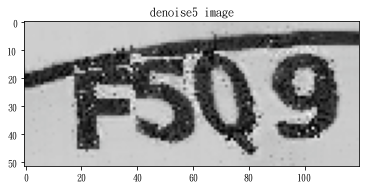

In [8]:
# denoise5
img5 = cv2.fastNlMeansDenoisingColored(img, None, 30, 30, 7, 25)  # 參數數值再自己挑看看
print(img5.shape)
print(img5.size)
plt.imshow(img5)
plt.axis('on')
plt.title('denoise5 image')
plt.show()

[[[206 206 206]
  [206 206 206]
  [206 206 206]
  ...
  [204 204 204]
  [204 204 204]
  [204 204 204]]

 [[206 206 206]
  [206 206 206]
  [206 206 206]
  ...
  [204 204 204]
  [204 204 204]
  [204 204 204]]

 [[206 206 206]
  [206 206 206]
  [206 206 206]
  ...
  [202 202 202]
  [199 200 200]
  [199 200 200]]

 ...

 [[204 204 204]
  [204 204 204]
  [204 204 204]
  ...
  [202 202 202]
  [202 202 202]
  [204 204 204]]

 [[204 204 204]
  [204 204 204]
  [204 204 204]
  ...
  [204 204 204]
  [202 202 202]
  [204 204 204]]

 [[206 206 206]
  [204 204 204]
  [206 206 206]
  ...
  [202 202 202]
  [204 204 204]
  [202 202 202]]]
(52, 120, 3)
18720


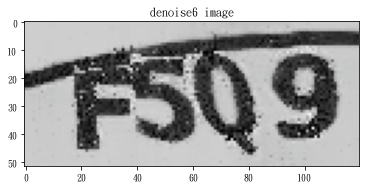

In [9]:
# denoise6
img6 = cv2.fastNlMeansDenoisingColored(img, None, 30, 30, 7, 31)  # 參數數值再自己挑看看
print(img6)
print(img6.shape)
print(img6.size)
plt.imshow(img6)
plt.axis('on')
plt.title('denoise6 image')
plt.show()

# 影像處理二值化：透過閥值對像素值篩選使原圖成為二值圖(黑白效果)

# [Link1](https://zh.wikipedia.org/wiki/%E7%81%B0%E5%BA%A6%E5%9B%BE%E5%83%8F)、[Link2](https://smasoft-tech.com/%e4%bb%80%e9%ba%bc%e6%98%af%e5%bd%b1%e5%83%8f%e5%89%8d%e8%99%95%e7%90%86/)、[Link3](https://blog.csdn.net/u012566751/article/details/77046445)、[Link4](https://blog.csdn.net/on2way/article/details/46812121)

127.0
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
(52, 120, 3)
18720


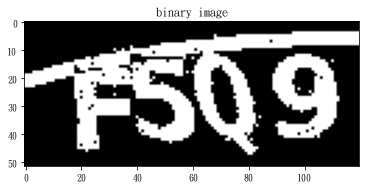

In [10]:
ret,threshold = cv2.threshold(img6,127,255,cv2.THRESH_BINARY_INV)
print(ret)
print(threshold)
print(threshold.shape)
print(threshold.size)
plt.imshow(threshold)
plt.axis('on')
plt.title('binary image')
plt.show()

# 轉換色彩空間

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(52, 120)
6240


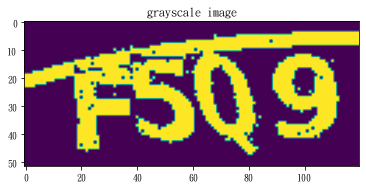

In [11]:
image6_gray = cv2.cvtColor(threshold,cv2.COLOR_BGR2GRAY)  # convert RGB to Grayscale image.
height, width = image6_gray.shape
print(image6_gray)
print(image6_gray.shape)
print(image6_gray.size)
plt.imshow(image6_gray)
plt.axis('on')
plt.title('grayscale image')
plt.show()

# 去除弧線

In [12]:
image6_gray[:,5:width-5] = 0
image_idx = where(image6_gray == 255)
print('x-axis: shape={} index={} '.format(image_idx[1].shape, image_idx[1]))
print('y-axis: shape={} index={} '.format(image_idx[0].shape, image_idx[0]))

x-axis: shape=(51,) index=[115 116 117 118 119 115 116 117 118 119 115 116 117 118 119 115 116 117
 118 119 115 116 117 118 119   3   4   0   1   2   3   4   0   1   2   3
   4   0   1   2   3   4   0   1   2   3   4   0   1   2   3] 
y-axis: shape=(51,) index=[ 4  4  4  4  4  5  5  5  5  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8
  8 18 18 19 19 19 19 19 20 20 20 20 20 21 21 21 21 21 22 22 22 22 22 23
 23 23 23] 


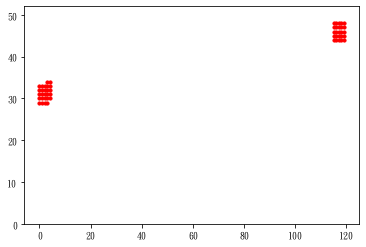

In [13]:
# 影像的座標(0,0)於左上角，作圖時的座標(0,0)於左下角。
plt.scatter(image_idx[1], height - image_idx[0], s=10, c='red')
plt.ylim(ymin=0, ymax=height)
plt.show()

In [14]:
xx = array([image_idx[1]])
yy = height - image_idx[0]
print(xx.shape, yy.shape)

(1, 51) (51,)


In [15]:
poly_reg= PolynomialFeatures(degree = 2)
l_reg = LinearRegression(n_jobs=-1)
xx_poly = poly_reg.fit_transform(xx.T)
l_reg.fit(xx_poly, yy)
xx2 = array([[i for i in range(width)]])
xx2_poly = poly_reg.fit_transform(xx2.T)

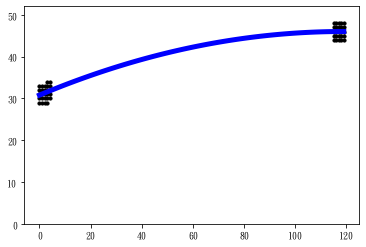

In [16]:
plt.scatter(xx,yy, s=10, color="black")
plt.ylim(ymin=0, ymax=height)
plt.plot(xx2.T, l_reg.predict(xx2_poly), color="blue", linewidth=5)
plt.show()

In [17]:
print('Coefficient:{}'.format(l_reg.coef_) )
print('Intercept:{}'.format(l_reg.intercept_) )

Coefficient:[ 0.          0.25597065 -0.00107671]
Intercept:30.792602538094844


In [18]:
# newimg = cv2.resize(image6_gray, (140, 48), interpolation=cv2.INTER_CUBIC)
newimg = cv2.cvtColor(threshold,cv2.COLOR_BGR2GRAY)
for ele in column_stack([l_reg.predict(xx2_poly).round(0), xx2[0]] ):
    # print(ele)
    pos = height - int(ele[0])
    # if newimg[pos-4:pos+4,int(ele[1])] == 255:
    # newimg[pos-3:pos+3,int(ele[1])] = 0 
    newimg[pos-3: pos+3,int(ele[1])] = 255 - newimg[pos-3: pos+3,int(ele[1])]

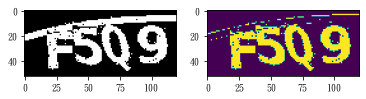

In [19]:
plt.subplot(121)
plt.imshow(threshold)
plt.subplot(122)
plt.imshow(newimg)
plt.show()

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... 54 54 54]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
(48, 140)
6720


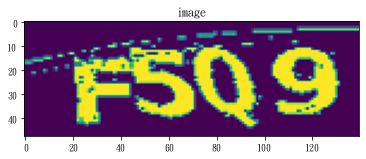

In [20]:
# resize
image = cv2.resize(newimg, (140, 48), interpolation=cv2.INTER_CUBIC)
print(image)
print(image.shape)
print(image.size)
plt.imshow(image)
plt.axis('on')
plt.title('image')
plt.show()